# EXPLORATORY DATA ANALYSIS 

In [50]:
import cv2
import numpy as np
import os

In [51]:
import time
import matplotlib.pyplot as plt
#reading of train images and converting each letter to particular label(0 to 46) as 46 letters are there
trainx=[]
trainy=[]
diction={}
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Train'
for index,folder in enumerate(os.listdir(directory)):
    diction[folder]=index
    directoryss = './DevanagariHandwrittenCharacterDataset/Train/'+folder
    for index,file in enumerate(os.listdir(directoryss)):
        img = cv2.imread(os.path.join(directoryss, file))
        trainx.append(img)
        trainy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")
    

the time took is  84.45410919189453  seconds


In [52]:
import time
testx=[]
testy=[]
starttime=time.time()
directory='./DevanagariHandwrittenCharacterDataset/Test'
for index,folder in enumerate(os.listdir(directory)):
    directoryss = './DevanagariHandwrittenCharacterDataset/Test/'+folder
    for file in os.listdir(directoryss):
        img = cv2.imread(os.path.join(directoryss, file))
        testx.append(img)
        testy.append(index) 
    index=index+1   
endtime=time.time()
print("the time took is ",endtime-starttime," seconds")    

the time took is  15.587993860244751  seconds


In [53]:
trainx=np.array(trainx)
trainy=np.array(trainy)
testx=np.array(testx)
testy=np.array(testy)

In [54]:
print("the no of images in train is ",trainx.shape[0])

the no of images in train is  78200


In [55]:
print("the no of images in test is ",testx.shape[0])

the no of images in test is  13800


In [56]:
trainx[0].shape

(32, 32, 3)

# PLOTTING EACH CHARCTER

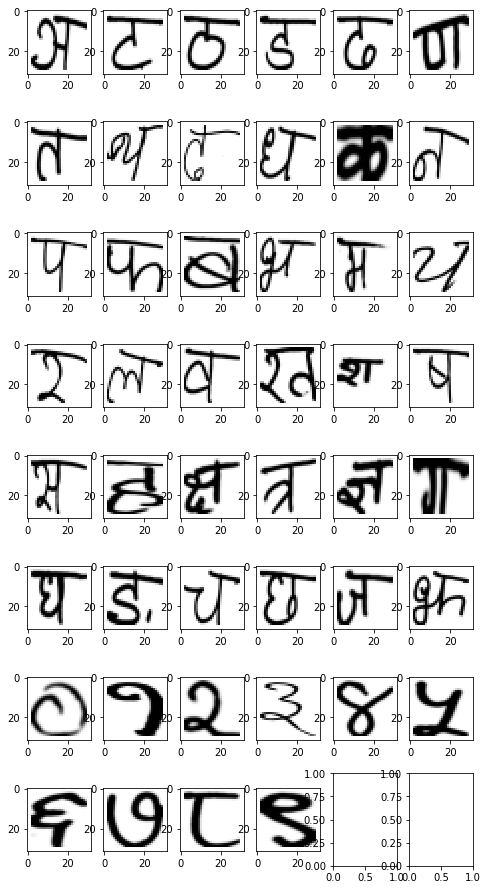

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
rows =8;columns=6;
diction={}
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
directory='./DevanagariHandwrittenCharacterDataset/Train'
rows=0
cols=0
for indexs,folder in enumerate(os.listdir(directory)):
    diction[folder]=index
    directoryss = './DevanagariHandwrittenCharacterDataset/Train/'+folder
    for index,file in enumerate(os.listdir(directoryss)):
        img = cv2.imread(os.path.join(directoryss, file),0)
        if index==0:
                if cols==5:
                    ax[rows,cols].imshow(img,cmap='binary')
                    rows=rows+1
                    cols=0
                elif rows==8:
                     break      
                else:
                    ax[rows,cols].imshow(img,cmap='binary')
                    cols=cols+1             

# Binning image intensity distribution of two characters

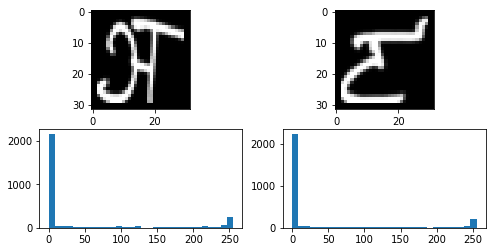

In [58]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(trainx[0], cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(trainx[2000], cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(trainx[0].flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(trainx[1].flatten(), bins=30)

# Image aggregation statistics

# RGB ranges of above two characters

In [65]:
from scipy.stats import describe
import pandas as pd

img1 = trainx[0].reshape((32*32), 3).T
img2 = trainx[2000].reshape((32*32), 3).T

cs = describe(img1, axis=1)
ds = describe(img2, axis=1)

img1_range = cs.minmax[1] - cs.minmax[0]
img2_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([img1_range, img2_range], 
                            columns=['R_range', 'G_range', 'B_range'])

In [66]:
rgb_range_df

,R_range,G_range,B_range
0,255,255,255
1,255,255,255


# Descriptive aggregations

# mean,variance,kurtosis,skewness,median of above two characters

In [67]:
img1_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
img2_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([img1_stats, img2_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])

In [68]:
stats_df

,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,48.79,48.79,48.79,7797.92,7797.92,7797.92,0.61,0.61,0.61,1.52,1.52,1.52,0.0,0.0,0.0
1,49.02,49.02,49.02,8239.11,8239.11,8239.11,0.61,0.61,0.61,1.55,1.55,1.55,0.0,0.0,0.0
